In [21]:
import numpy as np
import pandas as pd
import matplotlib
import statistics
import matplotlib.pyplot as plt
from scipy.stats import norm
matplotlib.style.use('ggplot')
%matplotlib inline 


In [2]:
df = pd.read_csv("C:/Users/Admin/OneDrive/Рабочий стол/предметы/ПЗВТ/15/r1z1.csv") 

In [3]:
df.describe()

,X
count,91.000000
mean,120.920879
std,2.429473
min,115.000000
25%,119.100000
50%,121.000000
75%,122.500000
max,127.000000


In [8]:
mas = (df.to_numpy()).flatten()
mas

array([124.5, 119. , 125. , 120. , 121. , 117. , 120. , 119.2, 120. ,
       121.5, 123.2, 122.5, 122. , 123.5, 121.7, 123. , 123. , 122. ,
       124. , 123.5, 120. , 117. , 120.5, 120. , 121. , 119. , 117. ,
       120.5, 121.5, 118.5, 124. , 121. , 120.5, 120.4, 115. , 117. ,
       123.5, 115. , 118.2, 118. , 116. , 118. , 118.6, 117. , 119.5,
       125. , 123.3, 117.2, 118.6, 122. , 121.5, 117.5, 121.1, 119. ,
       121.5, 121. , 121.5, 122. , 121.5, 123.5, 124.5, 120. , 122.5,
       123.5, 118.5, 122.5, 122. , 122. , 121.5, 119. , 120.9, 119. ,
       118.5, 120.5, 125.7, 122.5, 122.4, 120.5, 123.5, 127. , 119.5,
       122. , 120.5, 120. , 123. , 121. , 125. , 122.3, 120.5, 123. ,
       122. ])

In [5]:
print("размер", mas.size)
print("максимум", mas.max())
print("минимум", mas.min())
print("размах", mas.max() - mas.min())
print("среднее", mas.mean())
print("смещённая дисперсия", mas.var())
print("несмещённая дисперсия", mas.var(ddof=1))
print("стандартное отклонение", mas.std())
asymmetry = 0
for i in range(mas.size):
    asymmetry = asymmetry + (mas[i] - mas.mean())**3 
asymmetry = asymmetry / (mas.size * mas.std()**3)
print("асимметрия", asymmetry)
excess = 0
for i in range(mas.size):
    excess = excess + (mas[i] - mas.mean())**4
excess = (excess / (mas.size * mas.std()**4))-3
print("экцесс", excess)
print("медиана", np.median(mas))

размер 91
максимум 127.0
минимум 115.0
размах 12.0
среднее 120.9208791208791
смещённая дисперсия 5.837476150223404
несмещённая дисперсия 5.902336996336998
стандартное отклонение 2.416086950054448
асимметрия -0.18073425528010348
экцесс -0.20183453442057386
медиана 121.0


если судить по гистограмме, то мода, это промежуток от 121 до 121.55
мода не в промежутке =  122.0


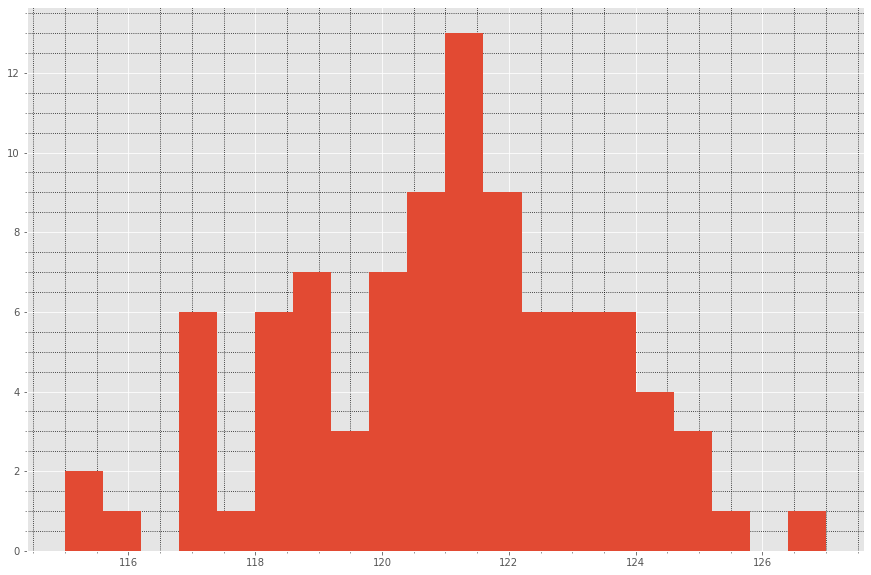

In [45]:
fig, axes = plt.subplots(figsize=(15, 10))
axes.hist(mas, bins = 20)
# axes.hist(mas, bins = 20, density=True)
axes.minorticks_on()
axes.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

# std_mas = mas.std()
# mean_mas = mas.mean()
# mas.sort()
# plt.plot(mas, norm.pdf(mas, mean_mas, std_mas))

mode_ = statistics.mode(mas)
print('если судить по гистограмме, то мода, это промежуток от 121 до 121.55')
print("мода не в промежутке = " , mode_)

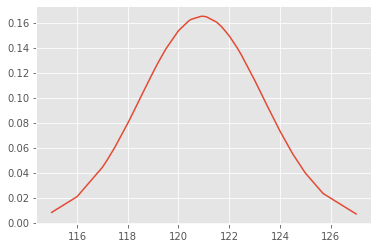

In [42]:
std_mas = mas.std()
mean_mas = mas.mean()
mas.sort()
plt.plot(mas, norm.pdf(mas, mean_mas, std_mas))

(114.0, 127.0)

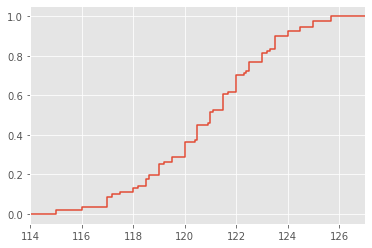

In [40]:
mas.sort()
empirical_fun_y = np.array([])
empirical_fun_x = np.array([])
num = 0;

empirical_fun_y = np.append(empirical_fun_y, 0)
empirical_fun_x = np.append(empirical_fun_x, 0)

for i in range(mas.size - 1):
    num = i
    while mas[i] == mas[i+1]:
        i=i+1
    empirical_fun_y = np.append(empirical_fun_y, num/mas.size)
    empirical_fun_x = np.append(empirical_fun_x, mas[i])

empirical_fun_y = np.append(empirical_fun_y, 1)
empirical_fun_x = np.append(empirical_fun_x, mas.max())

plt.step(empirical_fun_x, empirical_fun_y)
plt.xlim(mas.min() - 1, mas.max())